# Time-frequency analysis 

In this exercise we load a sample seismogram and perform a time-frequency analysis. The seismogram is from a seismic station in Albuquerque New Mexico. You can vary the component that is shown (Z,N,E). 

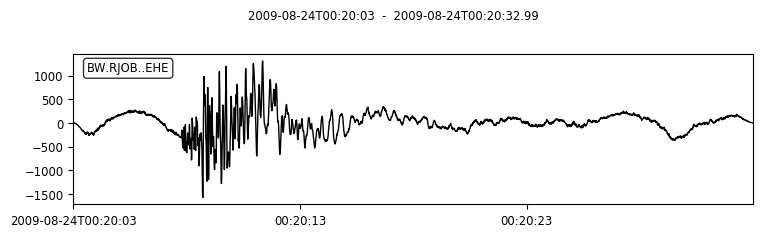

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
st = read()  # load example seismogram
st = st.select(component='E')
st.plot()

We can get at information of the seismogram (e.g., the sampling frequency) by typing "print(st)"

In [29]:
print(st[0])

BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


Now we can first look at the frequency content of the signal using exactly the same code as before!

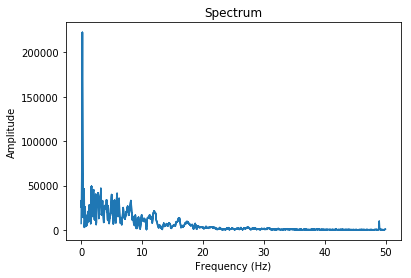

In [30]:
# With a sampling frequency of 100Hz we can get the sampling interval
dt = 1./100.    # .. which is 1 divided by the sampling rate

# We convert the obsPy trace into a vector with amplitudes 
tr = st[0]
f  = tr[:3000]

# Calculate and plot spectrum
spec = np.fft.fft(f) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

We see the strange energy at low frequencies! Let us lowpass filter and plot again!

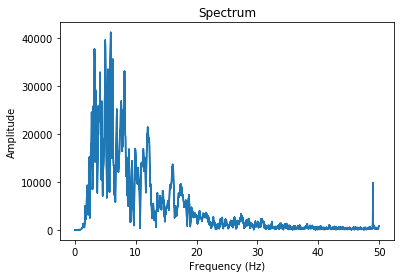

In [31]:
st.filter(type='highpass', freq=3.0)

# We convert the obsPy trace into a vector with amplitudes 
tr = st[0]
f  = tr[:3000]

# Calculate and plot spectrum
spec = np.fft.fft(f) # source time function in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt ) # time domain to frequency domain

plt.plot(np.abs(freq), np.abs(spec)) # plot frequency and amplitude
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


That analysis does NOT tell us WHEN which frequency arrives, so we calculate a "spectrogram", that is the time-frequency analysis 

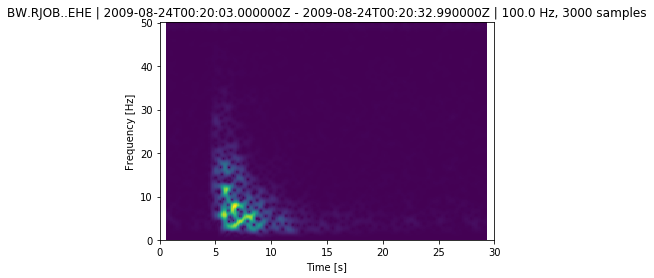

[None]

In [32]:
st.spectrogram()

Explain the time-frequency analysis and discuss the above figure!